In [42]:
import operator
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import math

### Создаём датасет заполняя его случайными точками

In [43]:
n = 150
k = 3
r = 10
xAxis = []
yAxis = []
train_points_class = []
training_points = []
test_points = []
test_points_class = []
for i in range(int(n * 0.9)):
    x = random.random() * 10
    y = random.random() * 10
    pointClass = 0
    xAxis.append(x)
    yAxis.append(y)
    if x < 5:
        if y < 5:
            #train_points_class.append(3)
            pointClass = 3
        else:
            #train_points_class.append(1)
            pointClass = 1
    else:
        if y < 5:
            #train_points_class.append(4)
            pointClass = 4
        else:
            #train_points_class.append(2)
            pointClass = 2
    train_points_class.append(pointClass)
    training_points.append((x, y, pointClass))
for i in range(int(n * 0.1)):
    x = random.random() * 10
    y = random.random() * 10
    if x < 5:
        if y < 5:
            pointClass = 3
        else:
            pointClass = 1
    else:
        if y < 5:
            pointClass = 4
        else:
            pointClass = 2
    test_points_class.append(pointClass)
    test_points.append((x, y, pointClass))
    #print(f"{xAxis[i]} {yAxis[i]} {pointsClass[i]}")
#print(xAxis)


### Визуализация датасета

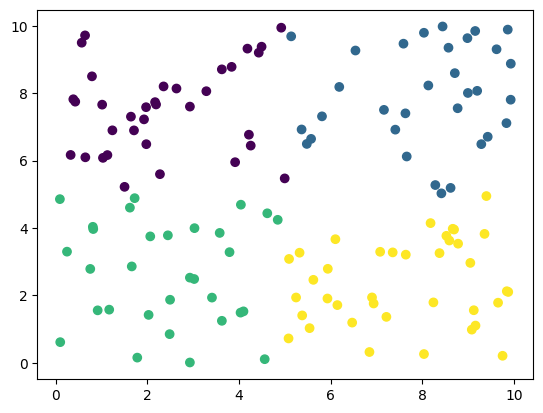

In [44]:
plt.scatter(xAxis, yAxis, c=train_points_class)

### Метод вычисления дистанции

In [45]:
def euclidean_distance(data1, data2):
    distance = 0
    for i in range(len(data1) - 1):
        distance += (data1[i] - data2[i]) ** 2
    return math.sqrt(distance)

### Метод поиска соседей

In [46]:
def find_neighbors(training, test, k):
    distances = []
    for i in range(len(training)):
        dist = euclidean_distance(test, training[i])
        distances.append((dist, training[i]))
    distances.sort()
    #print(distances)
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i])
    return neighbors

### Метод прогнозирования

In [47]:
def predict(neighbors):
    count = {}
    for neighbor in neighbors:
        if neighbor[1][-1] in count:
            count[neighbor[1][-1]] += 1
        else:
            count[neighbor[1][-1]] = 1
    result_class = max(count.items(), key=operator.itemgetter(1))[0]

    return result_class

### Предсказание классов и отрисовка предсказанных результатов

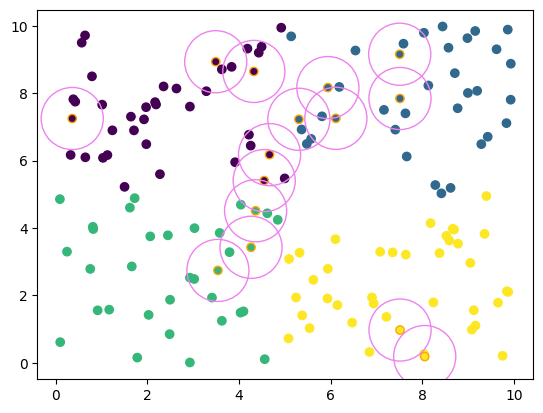

In [48]:
solved_points = []
for i in range(len(test_points)):
    neighbors = find_neighbors(training_points, test_points[i], k)
    #print(neighbors)
    prediction_class = predict(neighbors)
    solved_points.append([test_points[i][0], test_points[i][1], prediction_class])
#print(solved_points)
prediction_points_x = []
prediction_points_y = []
prediction_points_class = []
for point in solved_points:
    prediction_points_x.append(point[0])
    prediction_points_y.append(point[1])
    prediction_points_class.append(point[2])

plt.scatter(xAxis, yAxis, c=train_points_class)
plt.scatter(prediction_points_x, prediction_points_y, c=prediction_points_class, edgecolors="orange")
plt.scatter(prediction_points_x, prediction_points_y, s=2000, facecolors="none", edgecolors="violet")

plt.show()

### Проверка точности

In [49]:
def accuracy(test, test_prediction):
    correct = 0
    for i in range (len(test)):
        print(test[i][-1])
        if test[i][-1] == int(test_prediction[i]):
            correct += 1
    return (correct / len(test))

def get_accuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [50]:
print(confusion_matrix(test_points_class, prediction_points_class))
print(accuracy_score(test_points_class, prediction_points_class))

[[5 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 2]]
1.0
